In [174]:
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Radioactive Decay

## Radioactive decay is exponential

Since the probability that a radioistope decays is random, over time there will be fewer atoms remaining, and therefore fewer atoms that can decay. We can visualize this with a quick demo. Say we start with 100 atoms of a radioisotope, and every second there is a 25% chance that any given atom decays.

In [197]:
N_0 = 100
prob = 0.25

Let's create an array with an element for each particle, and assign it a 1 (the particle still exists) or 0 (the particle has decayed). The array is initially all ones because no isotopes have decayed.

In [198]:
particles = np.ones(N_0)

#### After the 1st Second

We now look to get started observing our simulated particles. Let's also create an array that will contain the fate of a particle after any given second. We will populate this array with newly drawn random values (on the interval 0 to 1) on each turn, and if the random number is less than 0.25, we will say that the particle has decayed. If the random numbers are drawn randomly and uniformly on the interval, there will be a 25% chance that the random number will be less than 0.25 and the particle decays.

In [199]:
fates = np.random.random(int(sum(particles)))

Now we observe the results.

In [200]:
def observe(particles,fates):
    for i in range(len(fates)):
        if fates[i] < 0.25:
            particles[i] = 0
    return particles
    
particles = observe(particles,fates)
print('There are now {} particles remaining.'.format(int(sum(particles))))

There are now 79 particles remaining.


We can repeat this process now repeatedly, and we plot the results for the first 10 seconds. We can see the exponential trend clearly (a true exponential is shown as a dashed line).

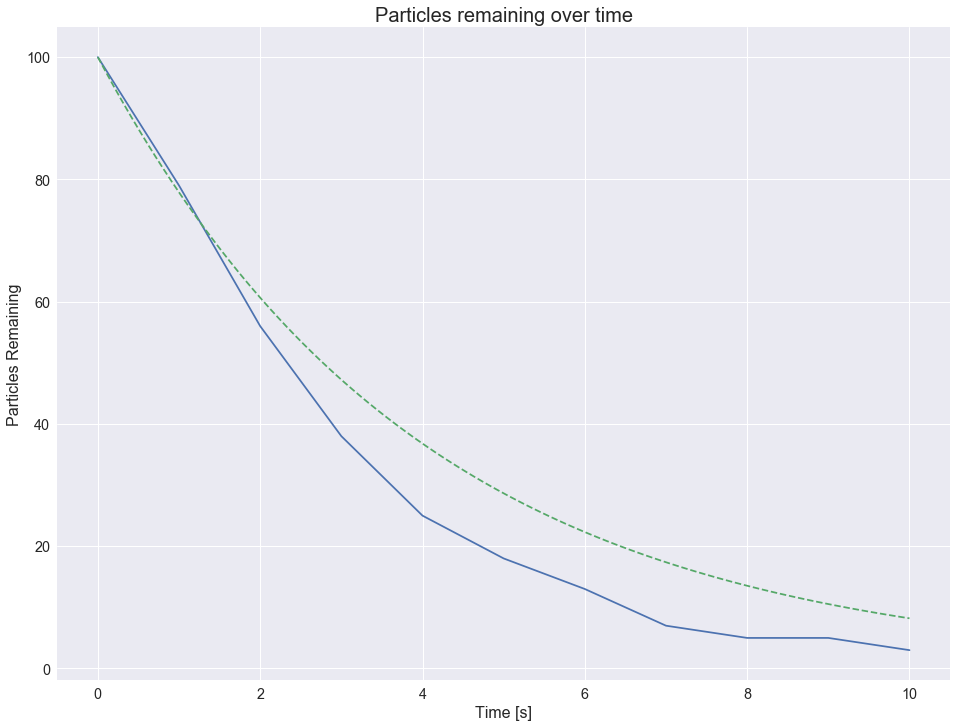

In [201]:
# Save the previous results, and repeat
remaining = [100,sum(particles)]
for t in range(1,10):
    fates = np.random.random(len(particles))
    particles = observe(particles,fates)
    remaining.append(int(sum(particles)))
# Plot results
fig,ax = plt.subplots(figsize=(16,12))
ax.set_title('Particles remaining over time',fontsize=20)
ax.set_xlabel('Time [s]',fontsize=16)
ax.set_ylabel('Particles Remaining',fontsize=16)
ax.tick_params(labelsize='large')
ax.plot(remaining)
t = np.linspace(0,10,100)
ax.plot(t,100*np.exp(-prob*t),'--')
plt.show()

## Comparing radioisotopes over time

Each radioactive isotope decays randomly with a distinct probability. The random nature of the decay causes the quantity, $N$, of a radioisotope remaining (from an initial population of $N_0$ particles at time $t_0$) at some later time, $t$, approximates an exponentially decaying function. The equation is

$$ N = N_0 e^{-t/\tau} $$

This next demo allows you to input the half-lives of any number of radioisotopes (in seconds) and the initial quantity of those isotopes (in atoms) to visually see this behavior.

First, specify the number of isotopes you'd like to consider.

In [115]:
num_isotopes = int(input('Number of isotopes to consider:'))

Number of isotopes to consider:3


Now, for each isotope, enter the isotopes half-life and initial quantity at time $t_0$. 

In [110]:
T_half = np.empty(num_isotopes)
N_0 = np.empty((num_isotopes,1))
for isotope in range(num_isotopes):
    # Enter half-life and initial quantity of material
    T_half[isotope]=int(input('Half-life of isotope {} (seconds):'.format(isotope+1)))
    N_0[isotope][0]=int(input('Initial quantity of isotope {} (atoms):'.format(isotope+1)))

# Using the half-life, find an appropriate amount of time over which to plot N
t_max = min(T_half)*5
t = np.linspace(0,t_max,100)

Half-life of isotope 1 (seconds):1
Initial quantity of isotope 1 (atoms):100
Half-life of isotope 2 (seconds):2
Initial quantity of isotope 2 (atoms):100
Half-life of isotope 3 (seconds):3
Initial quantity of isotope 3 (atoms):100


In [113]:
# Change half-life to lifetime
tau = T_half/np.log(2)
# Calculate remaining population for each isotope
N = N_0*np.exp(-np.outer(1/tau,t))

Finally, we plot the quantity of each isotope over time.

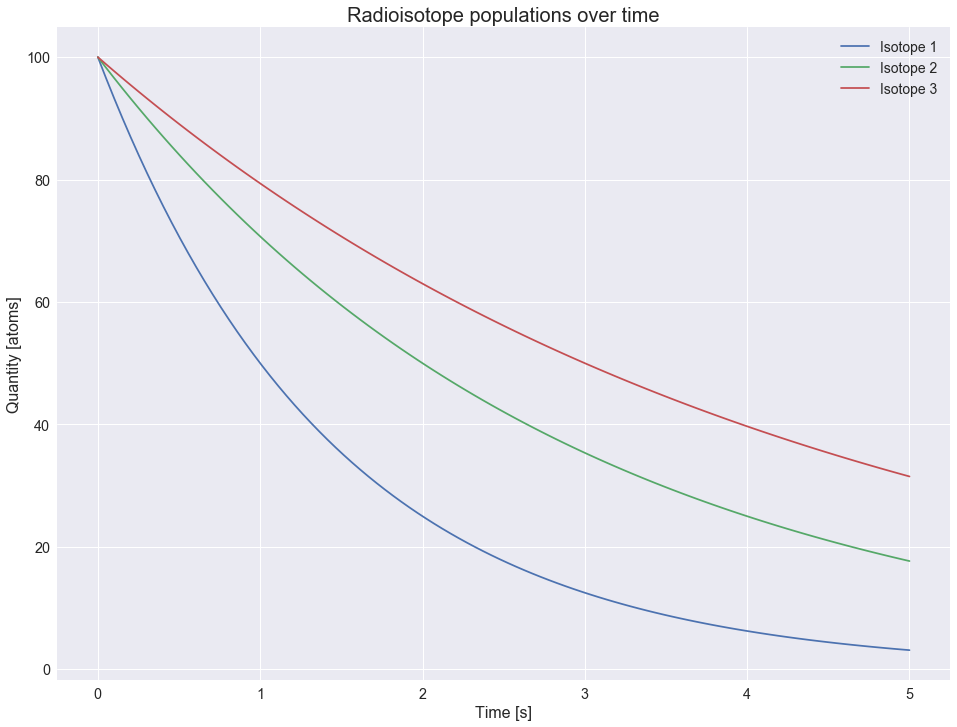

In [127]:
fig,ax = plt.subplots(figsize=(16,12))
ax.set_title('Radioisotope populations over time',fontsize=20)
ax.set_xlabel('Time [s]',fontsize=16)
ax.set_ylabel('Quantity [atoms]',fontsize=16)
ax.tick_params(labelsize='large')
for isotope in range(num_isotopes):
    ax.plot(t,N[isotope],label='Isotope {}'.format(isotope+1))
ax.legend(fontsize=14)
plt.show()